In [1]:
# To extract features and targets

In [2]:
# note: change it based on your folders/files file path
OHLC_PATH = "./data/alphavintage_AAPL.csv"
DATA_FOLDER = "./data"

In [3]:
import pandas as pd
import pandas_ta as ta

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# list of indicators
df = pd.DataFrame()
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [5]:
# load data
ohlc = pd.read_csv(OHLC_PATH, index_col="Timestamp", parse_dates=["Timestamp"])
ohlc = ohlc.sort_index()
ohlc

,Open,High,Low,Close
Timestamp,,,,
2019-01-02 04:00:00,37.145,37.224,36.793,37.213
2019-01-02 04:30:00,37.169,37.229,37.046,37.217
2019-01-02 05:00:00,37.169,37.229,37.151,37.169
2019-01-02 05:30:00,37.191,37.202,37.115,37.160
2019-01-02 06:00:00,37.189,37.200,37.067,37.179
...,...,...,...,...
2021-12-31 17:30:00,175.963,176.050,175.918,176.012
2021-12-31 18:00:00,176.012,176.060,175.938,176.032
2021-12-31 18:30:00,176.032,176.169,176.007,176.062


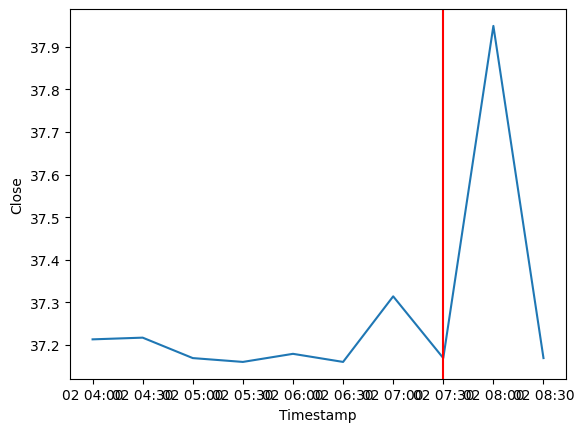

In [6]:
# plot some of close price
ax = sns.lineplot(x="Timestamp", y = "Close", data =ohlc.head(10))
plt.axvline(ohlc.head(10).index[7], color='red')

**Create Targets**

In [7]:
lookahead_period = 10
targets = ohlc.ta.log_return(cumulative=False, append=False, length=lookahead_period)
target_df = pd.DataFrame(targets)
target_df.columns = [f"TARGET_{c}" for c in target_df.columns]
target_df = target_df.shift(-lookahead_period-1)
ohlc = ohlc.join(target_df)
ohlc


,Open,High,Low,Close,TARGET_LOGRET_10
Timestamp,,,,,
2019-01-02 04:00:00,37.145,37.224,36.793,37.213,0.003166
2019-01-02 04:30:00,37.169,37.229,37.046,37.217,0.008066
2019-01-02 05:00:00,37.169,37.229,37.151,37.169,0.015541
2019-01-02 05:30:00,37.191,37.202,37.115,37.160,0.020156
2019-01-02 06:00:00,37.189,37.200,37.067,37.179,0.016494
...,...,...,...,...,...
2021-12-31 17:30:00,175.963,176.050,175.918,176.012,NaN
2021-12-31 18:00:00,176.012,176.060,175.938,176.032,NaN
2021-12-31 18:30:00,176.032,176.169,176.007,176.062,NaN


**Create Features**

In [8]:
lookback_periods = [10, 100, 500]
for lookback_period in lookback_periods:
    feature_types = ta.Strategy(
        name=f"features_{lookback_period}", 
        ta=[
            {"kind": "sma", "length": lookback_period},
            {"kind": "rsi", "length": lookback_period},
            {"kind": "stdev", "length": lookback_period},
            {"kind": "willr", "length": lookback_period},
            {"kind": "macd", "length": lookback_period},
        ])
    ohlc.ta.strategy(feature_types)
ohlc

,Open,High,Low,Close,TARGET_LOGRET_10,SMA_10,RSI_10,STDEV_10,WILLR_10,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_100,RSI_100,STDEV_100,WILLR_100,SMA_500,RSI_500,STDEV_500,WILLR_500
Timestamp,,,,,,,,,,,,,,,,,,,,
2019-01-02 04:00:00,37.145,37.224,36.793,37.213,0.003166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 04:30:00,37.169,37.229,37.046,37.217,0.008066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 05:00:00,37.169,37.229,37.151,37.169,0.015541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 05:30:00,37.191,37.202,37.115,37.160,0.020156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 06:00:00,37.189,37.200,37.067,37.179,0.016494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 17:30:00,175.963,176.050,175.918,176.012,NaN,176.0330,42.457688,0.116528,-72.118227,-0.210065,0.014550,-0.224614,177.34709,49.528423,0.831292,-87.198410,174.351028,52.446249,3.470271,-30.822281
2021-12-31 18:00:00,176.012,176.060,175.938,176.032,NaN,176.0271,43.408077,0.114745,-70.147783,-0.199288,0.020261,-0.219549,177.32905,49.573294,0.840102,-86.630712,174.356976,52.452065,3.470599,-30.689655
2021-12-31 18:30:00,176.032,176.169,176.007,176.062,NaN,176.0321,44.924165,0.115102,-67.192118,-0.186181,0.026694,-0.212875,177.31230,49.641129,0.848542,-85.779165,174.363360,52.460804,3.470794,-30.490716


In [9]:
ohlc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24082 entries, 2019-01-02 04:00:00 to 2021-12-31 19:30:00
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              24082 non-null  float64
 1   High              24082 non-null  float64
 2   Low               24082 non-null  float64
 3   Close             24082 non-null  float64
 4   TARGET_LOGRET_10  24071 non-null  float64
 5   SMA_10            24073 non-null  float64
 6   RSI_10            24072 non-null  float64
 7   STDEV_10          24073 non-null  float64
 8   WILLR_10          24073 non-null  float64
 9   MACD_12_26_9      24057 non-null  float64
 10  MACDh_12_26_9     24049 non-null  float64
 11  MACDs_12_26_9     24049 non-null  float64
 12  SMA_100           23983 non-null  float64
 13  RSI_100           23982 non-null  float64
 14  STDEV_100         23983 non-null  float64
 15  WILLR_100         23983 non-null  float64
 16  SMA_5

In [10]:
# align features
to_shift = max(lookback_periods)
ohlc = ohlc.iloc[to_shift:]

# align targets
ohlc = ohlc[:-lookahead_period-1]
ohlc


,Open,High,Low,Close,TARGET_LOGRET_10,SMA_10,RSI_10,STDEV_10,WILLR_10,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_100,RSI_100,STDEV_100,WILLR_100,SMA_500,RSI_500,STDEV_500,WILLR_500
Timestamp,,,,,,,,,,,,,,,,,,,,
2019-01-24 16:00:00,36.736,36.759,36.589,36.628,0.009792,36.6541,41.325010,0.078557,-58.702065,-0.104577,-0.008752,-0.095824,37.11921,47.205398,0.334492,-89.662302,36.527096,49.489438,0.874616,-39.181573
2019-01-24 16:30:00,36.628,36.747,36.610,36.688,0.010187,36.6431,45.641887,0.062158,-37.304075,-0.097745,-0.001536,-0.096209,37.10771,47.667379,0.329258,-85.179958,36.526038,49.615143,0.874099,-37.711345
2019-01-24 17:00:00,36.674,36.697,36.608,36.626,0.009014,36.6331,42.086723,0.054968,-53.220339,-0.096224,-0.000013,-0.096212,37.09523,47.235947,0.323521,-89.555399,36.524952,49.487623,0.873636,-39.230581
2019-01-24 17:30:00,36.683,36.694,36.622,36.664,0.010000,36.6374,45.003993,0.055594,-35.055351,-0.090905,0.004245,-0.095150,37.08476,47.529955,0.320318,-85.411765,36.523960,49.567227,0.873195,-38.299436
2019-01-24 18:00:00,36.654,36.666,36.598,36.616,0.010048,36.6355,42.032346,0.056008,-52.767528,-0.089531,0.004496,-0.094026,37.07396,47.194423,0.317697,-89.176471,36.522834,49.468555,0.872711,-39.475619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 12:00:00,176.171,176.318,175.700,175.973,-0.000057,176.5247,34.258159,0.286989,-86.322645,-0.207068,0.026347,-0.233414,177.57993,49.427132,0.726998,-90.230021,174.280504,52.452170,3.468477,-31.080902
2021-12-31 12:30:00,175.983,176.278,175.848,176.022,-0.000335,176.4781,35.961503,0.328449,-83.867735,-0.226649,0.005412,-0.232061,177.56357,49.530738,0.743446,-89.068058,174.285778,52.466204,3.469118,-30.755968
2021-12-31 13:00:00,176.022,176.228,175.918,176.091,0.000284,176.4275,38.456408,0.346573,-80.410822,-0.233903,-0.001473,-0.232430,177.54106,49.677376,0.753646,-87.431824,174.291546,52.485993,3.469718,-30.298408


In [11]:
# store data
ohlc.to_csv(f"{DATA_FOLDER}/features_targets.csv")